# New classification regime

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from NEMO_tools import reporj_NEMOgrid
% matplotlib inline

In [3]:
MAT=scipy.io.loadmat('_data/Exchange/River_class.mat')
lon = MAT['lon_i']
lat = MAT['lat_i']
Class = MAT['River_class_i']
Class=np.ma.masked_where(np.isnan(Class), Class)

In [4]:
name = ['Pechora', 'Ob', 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', 'Sev. Dvina', 'Lena',\
        'khatanga', 'Taimyra', 'Pyasina', 'Coppermine', 'Back', 'Hayes', 'Thomsen', 'Cunningham', 'Clyde']
lons = [55, 70, 83, 120, 137, 151.5, 162, -135, 40, 127, 107, 100, 87, -115, -95.3, -92, -120, -94, -68.5]
lats = [68.5, 66.5, 71, 73, 71.5, 71.5, 69.5, 69, 65, 73.5, 73.5, 76, 74, 68,67.2, 57, 74, 74, 70.5]

In [5]:
ETOPO2_Arctic=scipy.io.loadmat('_libs/ETOPO2_Arctic.mat')
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']
#
res_unit=5
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1

In [6]:
Regions = ['None [Greenland & Iceland]', 'Cunningham [C. A. Archipelago]', 'Thomsen [C. A. Archipelago]', 'Clyde [C. A. Archipelago]',\
           'Back [C. A. Archipelago]', 'Coppermine [Nunavut]', 'Mackenzie [Beaufort S.]', 'Yukon [Bearing Strait]', 'Kolyma [E. Siberian S.]',\
           'Indigirka [E. Siberian S.]', 'Yana [Laptev Sea]', 'Lena [Laptev Sea]', 'Khatanga [Laptev Sea]', 'Taimyra [Laptev Sea]', \
           'Pyasina [Kara Sea]', 'Yenisey [Kara Sea]', "Ob' [Kara Sea]", 'Pechora [Kara Sea]', 'S. Dev. (X) [Barents S.]', \
           'None [Scandinavian P.]']

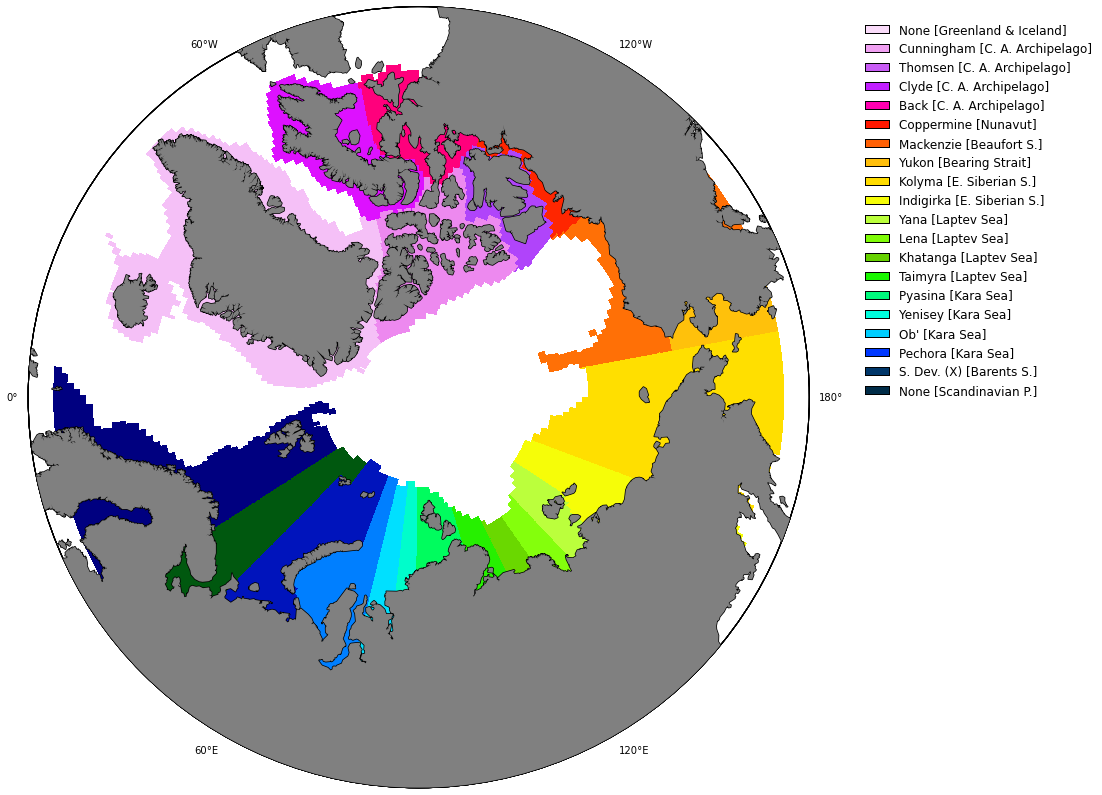

In [15]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=58, lon_0=90, round=True, ax=ax)
proj.drawcoastlines(linestyle='-', color='k', linewidth=1.5, zorder=3)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=3)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90, linewidth=0.0)
topox, topoy = proj(lon_arctic, lat_arctic)
x, y=proj(lon, lat)
# plot
CS=proj.contourf(x, y, Class, 22, cmap=plt.cm.gist_ncar_r)
proj.pcolor(x, y, Class, vmin=0, vmax=21, cmap=plt.cm.gist_ncar_r)
#proj.contour(topox, topoy, topo_arctic, [1000, 2000, 3000], linewidths=1.5, linestyles='-', colors='gray', label='1, 2, 3 km bathymetry')
proxy = [plt.Rectangle((0, 0), 1, 1, fc = pc.get_facecolor()[0]) for pc in CS.collections]
LG=plt.legend(proxy, Regions, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 


In [10]:
#ANHA4_name=glob.glob('_data/NEMO/ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc')
#ANH4_obj=nc.Dataset(ANHA4_name[0])
## Variables
#nav_lon=ANH4_obj.variables['nav_lon'][:]
#nav_lat=ANH4_obj.variables['nav_lat'][:]
#runoff=ANH4_obj.variables['runoff'][:]*1e4